In [26]:
# initial setup for any notebook

%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/home/yarcoh/projects/thesis-code4") # go to parent dir

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from apps.optics.noise_searcher2 import NoiseSearcher2
from src.optics.config_manager import ChannelConfig
import os
import yaml

In [28]:
dir_path = '/data/yarcoh/thesis_data/data/outputs/ber_maps/2023.09.03-01.15.09'


In [29]:
# read config file from dir_path and insert those values into ChannelConfig
config_path = os.path.join(dir_path, 'cs_config.yml')

# read yaml:
with open(config_path, 'r') as stream:
    conf = yaml.safe_load(stream)

print(conf)

{'M_QAM': 16, 'Nos': 16, 'Nspans': 12, 'Ts': 1.0, 'W': 0.05, 'alphadB': 0.2, 'bet': 0.2, 'beta2': -21.0, 'dz': 0.2, 'eta': 2, 'gamma': 1.27, 'mu': 0.1, 'span_length': 80, 'with_noise': True, 'with_ssf': True}


In [30]:
channel_config = ChannelConfig(**conf)
ns = NoiseSearcher2.load_from_config(channel_config)

BERs, mus = ns.load_ber_map(dir_path)


In [31]:
ns.print_ber_vec(BERs, mus)

        mu          BER
----------  -----------
0.005       0.450684
0.00629617  0.432129
0.00792836  0.419141
0.00998366  0.390234
0.0125718   0.367969
0.0158308   0.319922
0.0199347   0.267383
0.0251024   0.225098
0.0316098   0.171484
0.0398042   0.125391
0.0501228   0.0803711
0.0631164   0.0486328
0.0794783   0.0211914
0.100082    0.00673828
0.126026    0.000585937
0.158697    9.76563e-05
0.199837    9.76563e-05
0.251641    0
0.316875    0
0.39902     0.000292969
0.502459    0.0209961
0.632714    0.135742
0.796735    0.249902
1.00328     0.329199
1.26336     0.357812
1.59087     0.430664
2.00327     0.498926
2.52259     0.625977
3.17653     0.812402
4           0.622168


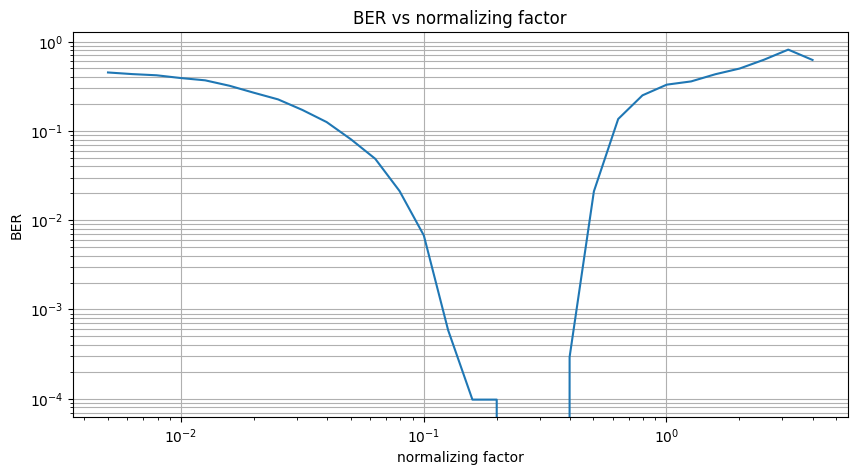

In [32]:
ns.plot_ber_map(BERs, mus,log_mu=True)